In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import pickle

In [2]:
df = pd.read_csv("internet_service_churn.csv")

In [3]:
df

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1


In [4]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


Термін підписки не може бути негативним. Виправимо це.

In [5]:
df = df[df['subscription_age'] >= 0]

In [6]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227300e+04,72273.000000,72273.000000,72273.000000,72273.000000,50701.000000,72273.000000,71892.000000,71892.000000,72273.000000,72273.000000
mean,8.463075e+05,0.815270,0.334634,2.450085,18.942745,0.716052,0.274238,43.690066,4.192116,0.207616,0.554135
std,4.890971e+05,0.388081,0.471866,2.034983,13.215290,0.697103,0.816626,63.406391,9.818959,0.997130,0.497064
min,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222160e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477820e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269553e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [7]:
# Видаляємо стовпець 'customerID'
df = df.drop('id', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72273 entries, 0 to 72273
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             72273 non-null  int64  
 1   is_movie_package_subscriber  72273 non-null  int64  
 2   subscription_age             72273 non-null  float64
 3   bill_avg                     72273 non-null  int64  
 4   reamining_contract           50701 non-null  float64
 5   service_failure_count        72273 non-null  int64  
 6   download_avg                 71892 non-null  float64
 7   upload_avg                   71892 non-null  float64
 8   download_over_limit          72273 non-null  int64  
 9   churn                        72273 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 6.1 MB


# Заповнення пропущених значень середнім значенням

In [9]:
df['reamining_contract'].fillna(df['reamining_contract'].mean(), inplace=True)
df['download_avg'].fillna(df['download_avg'].mean(), inplace=True)
df['upload_avg'].fillna(df['upload_avg'].mean(), inplace=True)

In [10]:
# Перевіримо, чи залишились пропущені значення
missing_values_after = df.isnull().sum()
missing_values_after

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64

# Масштабування числових змінних

In [11]:
numeric_features = ['subscription_age', 'bill_avg', 'reamining_contract',
                    'service_failure_count', 'download_avg', 'upload_avg','download_over_limit']

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Перегляд результатів
df

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,4.668334,0.458355,-0.986616,-0.335821,-0.558046,-0.193212,-0.208215,0
1,0,0,2.835382,-1.433406,0.000000,-0.335821,-0.690877,-0.428074,-0.208215,1
2,1,0,3.174453,-0.222679,-1.226398,-0.335821,-0.474237,-0.336171,-0.208215,1
3,0,0,2.171981,0.155673,0.000000,0.888739,-0.690877,-0.428074,-0.208215,1
4,0,0,1.936105,-1.433406,0.000000,-0.335821,-0.690877,-0.428074,-0.208215,1
...,...,...,...,...,...,...,...,...,...,...
72269,1,1,-1.159765,-1.433406,0.914505,-0.335821,-0.690877,-0.428074,-0.208215,1
72270,1,0,-1.174507,-1.357736,1.565339,-0.335821,-0.678226,-0.428074,-0.208215,1
72271,1,0,-1.194163,-1.433406,2.524463,-0.335821,-0.667157,-0.407651,-0.208215,1
72272,0,0,-1.199077,-1.433406,0.006762,-0.335821,-0.690877,-0.428074,-0.208215,1


In [12]:
df.describe()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,72273.000000,72273.000000,7.227300e+04,7.227300e+04,7.227300e+04,7.227300e+04,7.227300e+04,7.227300e+04,7.227300e+04,72273.000000
mean,0.815270,0.334634,-1.258416e-17,-6.449380e-17,1.258416e-17,-7.471843e-18,6.292078e-18,-3.303341e-17,5.033662e-17,0.554135
std,0.388081,0.471866,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.497064
min,0.000000,0.000000,-1.203991e+00,-1.433406e+00,-1.226398e+00,-3.358206e-01,-6.908765e-01,-4.280738e-01,-2.082146e-01,0.000000
25%,1.000000,0.000000,-7.469820e-01,-4.496902e-01,-1.106507e+00,-3.358206e-01,-5.833473e-01,-3.770168e-01,-2.082146e-01,0.000000
50%,1.000000,0.000000,-2.310037e-01,4.332521e-03,0.000000e+00,-3.358206e-01,-2.465277e-01,-2.136344e-01,-2.082146e-01,1.000000
75%,1.000000,1.000000,4.176548e-01,2.313439e-01,5.548333e-01,-3.358206e-01,2.610737e-01,6.207348e-02,-2.082146e-01,1.000000
max,1.000000,1.000000,5.086030e+00,2.928880e+01,3.774750e+00,2.293081e+01,6.912724e+01,4.586021e+01,6.811983e+00,1.000000


In [13]:
# Визначимо цільову змінну та ознаки
X = df.drop(columns=['churn'])
y = df['churn']

# Розділимо дані на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Ініціалізація та навчання моделі випадкового лісу
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Прогнозування та оцінка якості моделі випадкового лісу
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, f1_rf, cm_rf, report_rf
print(report_rf)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6532
           1       0.95      0.93      0.94      7923

    accuracy                           0.94     14455
   macro avg       0.94      0.94      0.94     14455
weighted avg       0.94      0.94      0.94     14455



Оцінка точності моделі:

Для класу 0 точність становить 0,92, що означає, що 92% всіх прогнозованих випадків класу 0 ідентифіковано правильно.
Для класу 1 точність становить 0,95, що означає, що 95% всіх прогнозованих випадків класу 1 є точними.
З точки зору повноти:

Клас 0 має повноту 0,95, що означає, що 95% всіх фактичних зразків класу 0 правильно прогнозуються як клас 0.
Клас 1 має повноту 0,93, що означає, що 93% всіх фактичних випадків класу 1 точно ідентифіковані.
Показник F1, який балансує між точністю та відкликанням, становить

0,93 для класу 0
0,94 для класу 1
Щодо підтримки:

У тестовому наборі 6532 екземпляри класу 0.
У тестовому наборі є 7923 екземпляри класу 1.
Загальна точність моделі становить 0,94, що означає, що 94% всіх прогнозів (для обох класів) є правильними.

Макросереднє значення, яке є середнім значенням точності, повноти та F1-оцінки для класів без урахування частоти класів, та середньозважене значення, яке враховує частоту класів, відображають збалансовану продуктивність моделі.

Загалом, модель демонструє хороші результати з високою точністю,  повнотою і F1-оцінкою для обох класів. Точність і повнота є вищими для класу 1, що свідчить про те, що модель є особливо вправною в класифікації цього класу. Висока загальна точність 94% вказує на ефективність моделі у прогнозуванні відтоку клієнтів.



# Прогнозування ймовірностей

In [15]:
y_proba_rf = rf_model.predict_proba(X_test)

# Визначення порогу для високої ймовірності відтоку (наприклад, 0.5)

In [16]:
threshold = 0.5
high_risk_indices = y_proba_rf[:, 1] >= threshold

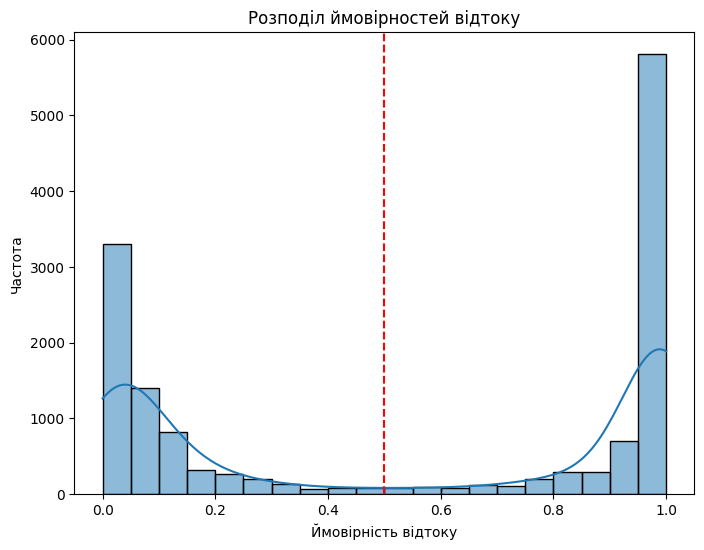

In [17]:
# Візуалізація розподілу ймовірностей відтоку
plt.figure(figsize=(8, 6))
sns.histplot(y_proba_rf[:, 1], kde=True, bins=20)
plt.axvline(x=threshold, color='r', linestyle='--')
plt.xlabel('Ймовірність відтоку')
plt.ylabel('Частота')
plt.title('Розподіл ймовірностей відтоку')
plt.show()

# Збереження моделі у файл

In [18]:
with open('rf_modelf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Збереження  масштабувальника

In [19]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)